# Exploratory Data Analysis (EDA) on Fraudulent Transactions Dataset

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


### Load data

In [37]:
df = pd.read_csv('data/fraud_mock.csv')

### Data overview & Characteristics of the dataset

In [5]:
df.head(100)

,time_ind,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,acc910286,170136.0,160296.36,acc298089,0.00,0.00,0,0
1,1,PAYMENT,1864.28,acc6597009,21249.0,19384.72,acc8726693,0.00,0.00,0,0
2,1,TRANSFER,181.00,acc1796908,181.0,0.00,acc4938640,0.00,0.00,1,0
3,1,CASH_OUT,181.00,acc4182296,181.0,0.00,acc1221153,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,acc7841596,41554.0,29885.86,acc5599142,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,acc6399669,0.0,0.00,acc1524512,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,acc6966730,0.0,0.00,acc5471629,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,acc8642078,0.0,0.00,acc8597652,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,acc2132826,15443.0,12567.90,acc6070304,0.00,0.00,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time_ind          int64  
 1   transac_type      object 
 2   amount            float64
 3   src_acc           object 
 4   src_bal           float64
 5   src_new_bal       float64
 6   dst_acc           object 
 7   dst_bal           float64
 8   dst_new_bal       float64
 9   is_fraud          int64  
 10  is_flagged_fraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,time_ind,amount,src_bal,src_new_bal,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()

time_ind            0
transac_type        0
amount              0
src_acc             0
src_bal             0
src_new_bal         0
dst_acc             0
dst_bal             0
dst_new_bal         0
is_fraud            0
is_flagged_fraud    0
dtype: int64

### Add reference date

In [38]:
start_date = pd.Timestamp("2025-01-01 00:00:00")

date = start_date + pd.to_timedelta(df['time_ind'], unit='h')
df.insert(1, 'date', date.dt.date)
df.insert(2, 'time', date.dt.time)
df.insert(3, 'dayofweek', date.dt.dayofweek)  # 0=Monday, 6=Sunday

In [39]:
df.head()

,time_ind,date,time,dayofweek,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
0,1,2025-01-01,01:00:00,2,PAYMENT,9839.64,acc910286,170136.0,160296.36,acc298089,0.0,0.0,0,0
1,1,2025-01-01,01:00:00,2,PAYMENT,1864.28,acc6597009,21249.0,19384.72,acc8726693,0.0,0.0,0,0
2,1,2025-01-01,01:00:00,2,TRANSFER,181.00,acc1796908,181.0,0.00,acc4938640,0.0,0.0,1,0
3,1,2025-01-01,01:00:00,2,CASH_OUT,181.00,acc4182296,181.0,0.00,acc1221153,21182.0,0.0,1,0
4,1,2025-01-01,01:00:00,2,PAYMENT,11668.14,acc7841596,41554.0,29885.86,acc5599142,0.0,0.0,0,0


### Characteristics of the target feature


In [27]:
df['is_fraud'].value_counts()

is_fraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [28]:
df[df['is_fraud'] == 1].describe()

,time_ind,date,amount,src_bal,src_new_bal,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud,event_dayofweek
count,8213.000000,8213,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000,8213.000000
mean,368.413856,2025-01-16 08:24:49.881894656,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948,3.044198
min,1.000000,2025-01-01 01:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,0.000000
25%,181.000000,2025-01-08 13:00:00,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000,2.000000
50%,367.000000,2025-01-16 07:00:00,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000,3.000000
75%,558.000000,2025-01-24 06:00:00,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000,5.000000
max,743.000000,2025-01-31 23:00:00,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000,6.000000
std,216.388690,NaN,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097,1.899476


In [29]:
df[df['is_fraud'] == 0].describe()

,time_ind,date,amount,src_bal,src_new_bal,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud,event_dayofweek
count,6.354407e+06,6354407,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0,6.354407e+06
mean,2.432357e+02,2025-01-11 03:14:08.387018240,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0,0.0,2.549164e+00
min,1.000000e+00,2025-01-01 01:00:00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
25%,1.560000e+02,2025-01-07 12:00:00,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.000000e+00
50%,2.390000e+02,2025-01-10 23:00:00,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0,0.0,2.000000e+00
75%,3.340000e+02,2025-01-14 22:00:00,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0,4.000000e+00
max,7.180000e+02,2025-01-30 22:00:00,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0,6.000000e+00
std,1.421402e+02,NaN,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0,0.0,1.691439e+00


In [45]:
fraud_src_acc = df[df['is_fraud'] == 1]['src_acc'].unique()
fraud_dst_acc = df[df['is_fraud'] == 1]['dst_acc'].unique()

In [46]:
df[df['src_acc'].isin(fraud_src_acc)].sort_values(by=['src_acc', 'time_ind'])

,time_ind,date,time,dayofweek,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
6231088,592,2025-01-25,16:00:00,5,CASH_OUT,369306.87,acc1001064,369306.87,0.00,acc5917208,786338.72,1155645.58,1,0
5987912,410,2025-01-18,02:00:00,5,TRANSFER,1232013.70,acc1003010,1232013.70,0.00,acc2560078,0.00,0.00,1,0
6273203,636,2025-01-27,12:00:00,0,CASH_OUT,654250.76,acc1003373,654250.76,0.00,acc7717272,1218721.44,1872972.21,1,0
2537919,205,2025-01-09,13:00:00,3,TRANSFER,96640.12,acc1003456,96640.12,0.00,acc6700200,0.00,0.00,1,0
2333454,188,2025-01-08,20:00:00,2,CASH_OUT,389214.05,acc1004928,389214.05,0.00,acc225381,0.00,389214.05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008413,432,2025-01-19,00:00:00,6,CASH_OUT,907361.75,acc998000,907361.75,0.00,acc6507714,1536176.46,2443538.20,1,0
1059666,115,2025-01-05,19:00:00,6,TRANSFER,116977.16,acc998512,116977.16,0.00,acc7916092,0.00,0.00,1,0
5988245,414,2025-01-18,06:00:00,5,TRANSFER,10000000.00,acc998866,10724264.21,724264.21,acc7891320,0.00,0.00,1,0
2392536,201,2025-01-09,09:00:00,3,CASH_OUT,564699.59,acc99895,564699.59,0.00,acc2609264,0.00,564699.59,1,0


In [47]:
df[df['src_acc'].isin(fraud_src_acc)][df[df['src_acc'].isin(fraud_src_acc)].groupby('src_acc')['src_acc'].transform('count') > 1].sort_values(by=['src_acc', 'time_ind'])

,time_ind,date,time,dayofweek,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
4388744,317,2025-01-14,05:00:00,1,TRANSFER,322991.82,acc1183723,322991.82,0.00,acc7034868,0.00,0.00,1,0
4530275,326,2025-01-14,14:00:00,1,PAYMENT,11569.93,acc1183723,45736.12,34166.20,acc4092880,0.00,0.00,0,0
2531840,205,2025-01-09,13:00:00,3,TRANSFER,216179.15,acc1446362,216179.15,0.00,acc3884762,0.00,0.00,1,0
5431086,378,2025-01-16,18:00:00,3,TRANSFER,319013.80,acc1446362,686.00,0.00,acc1745302,25878218.93,26197232.73,0,0
6014205,449,2025-01-19,17:00:00,6,TRANSFER,1965786.11,acc148089,1965786.11,0.00,acc4598512,0.00,0.00,1,0
6014838,451,2025-01-19,19:00:00,6,CASH_OUT,234007.52,acc148089,30064.00,0.00,acc8047440,464352.47,698359.98,0,0
3579030,261,2025-01-11,21:00:00,5,CASH_OUT,43540.18,acc156404,125501.97,81961.79,acc5164961,462839.58,506379.76,0,0
6362423,727,2025-01-31,07:00:00,4,CASH_OUT,263401.81,acc156404,263401.81,0.00,acc4802172,251586.80,514988.60,1,0
702836,37,2025-01-02,13:00:00,3,CASH_OUT,133837.91,acc2133631,170.00,0.00,acc2015390,1549511.12,1683349.03,0,0
6118837,537,2025-01-23,09:00:00,3,TRANSFER,127447.68,acc2133631,127447.68,0.00,acc8237406,0.00,0.00,1,0


In [48]:
df[df['dst_acc'].isin(fraud_dst_acc)][df[df['dst_acc'].isin(fraud_dst_acc)].groupby('dst_acc')['dst_acc'].transform('count') > 1].sort_values(by=['dst_acc', 'time_ind'])

,time_ind,date,time,dayofweek,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
1629178,157,2025-01-07,13:00:00,1,CASH_OUT,148437.26,acc5175653,14598.00,0.0,acc1000922,77953.23,226390.49,0,0
2065817,181,2025-01-08,13:00:00,2,CASH_OUT,28770.53,acc1837774,0.00,0.0,acc1000922,226390.49,255161.02,0,0
2486680,204,2025-01-09,12:00:00,3,CASH_OUT,274945.55,acc6212196,1006.00,0.0,acc1000922,255161.02,530106.58,0,0
2640214,209,2025-01-09,17:00:00,3,CASH_OUT,99507.66,acc5326261,0.00,0.0,acc1000922,530106.58,629614.24,0,0
3668787,276,2025-01-12,12:00:00,6,CASH_OUT,130909.04,acc1416358,227.00,0.0,acc1000922,629614.24,760523.28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934374,285,2025-01-12,21:00:00,6,CASH_OUT,287417.31,acc5102357,0.00,0.0,acc999245,386129.17,673546.48,0,0
4249414,306,2025-01-13,18:00:00,0,CASH_OUT,28596.17,acc5245659,247.00,0.0,acc999245,673546.48,702142.65,0,0
4744250,332,2025-01-14,20:00:00,1,TRANSFER,935387.92,acc4825288,165.00,0.0,acc999245,702142.65,1637530.56,0,0
5303814,373,2025-01-16,13:00:00,3,TRANSFER,1947373.93,acc3428218,21851.00,0.0,acc999245,1637530.56,3584904.50,0,0


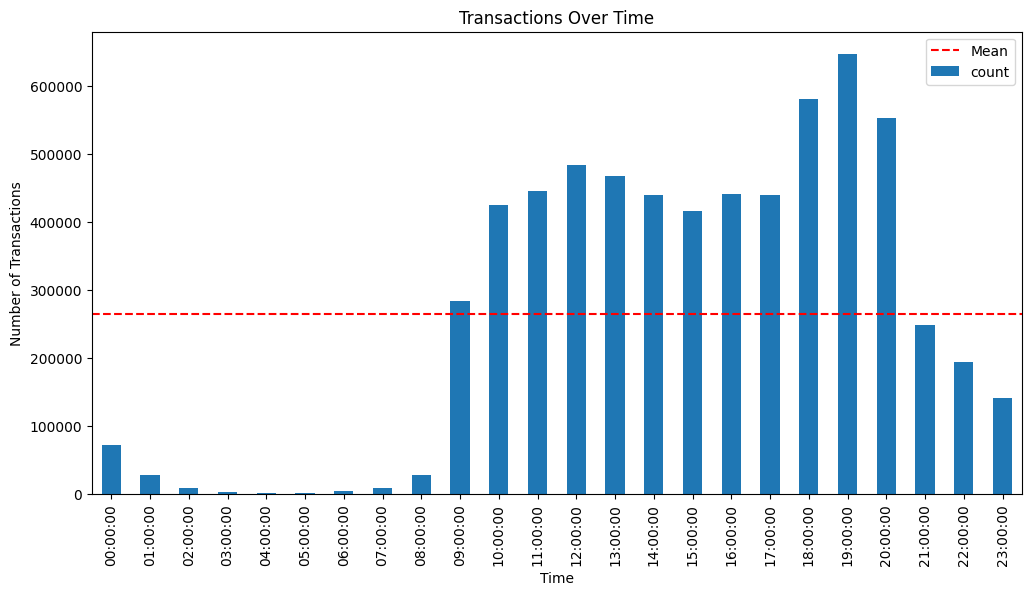

In [73]:
plt.figure(figsize=(12, 6))
df['time'].value_counts().sort_index().plot(kind='bar')
plt.axhline(df['time'].value_counts().mean(), color='red', linestyle='--', label='Mean')
plt.title('Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

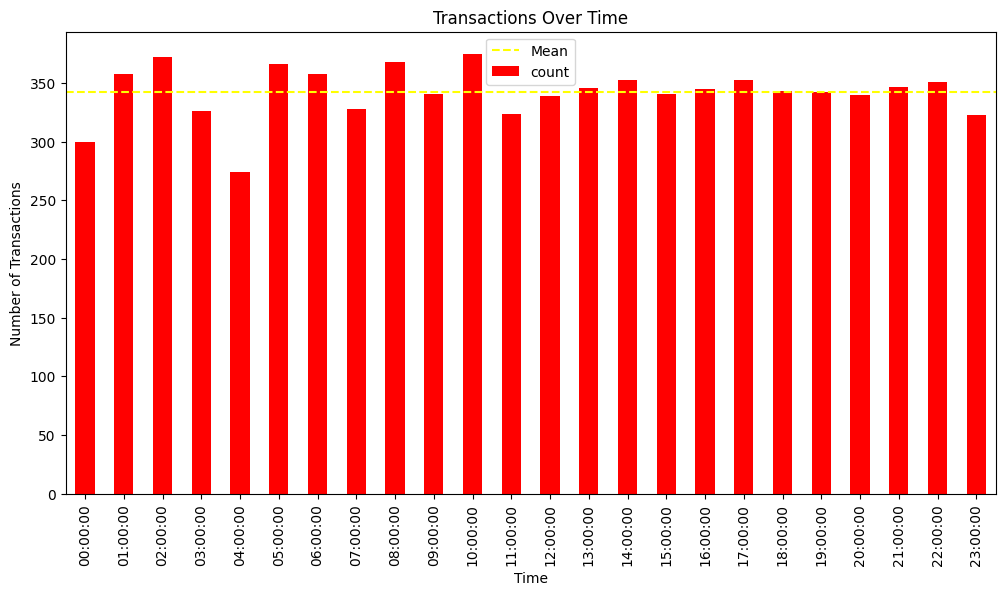

In [115]:
plt.figure(figsize=(12, 6))
df[df['is_fraud']==1]['time'].value_counts().sort_index().plot(kind='bar', color='red')
plt.axhline(df[df['is_fraud']==1]['time'].value_counts().mean(), color='yellow', linestyle='--', label='Mean')
plt.title('Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

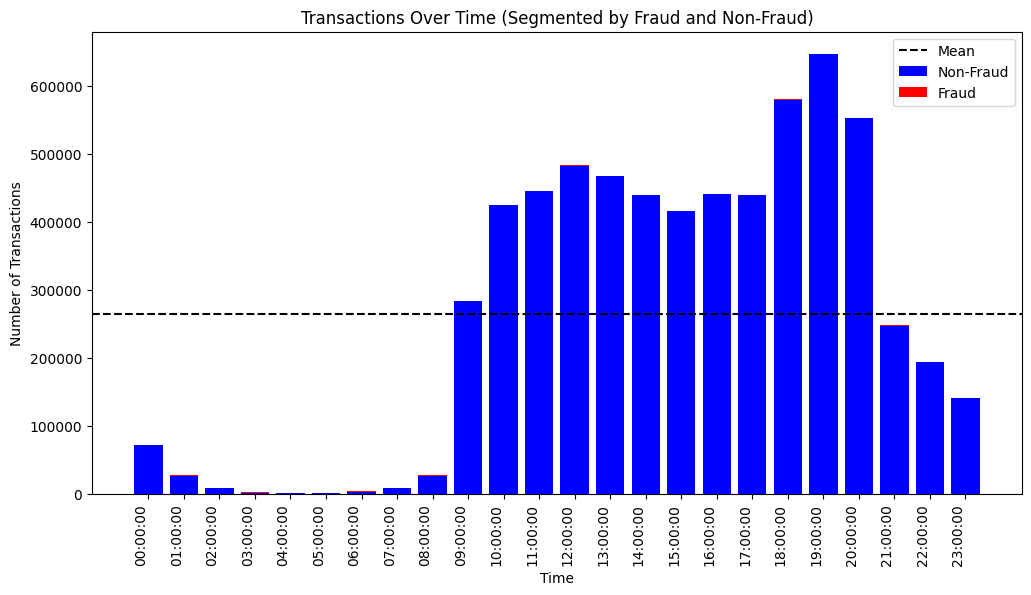

In [116]:
# Group data by time and is_fraud, then count occurrences
fraud_counts = df[df['is_fraud'] == 1]['time'].value_counts().sort_index()
non_fraud_counts = df[df['is_fraud'] == 0]['time'].value_counts().sort_index()

# Align the indices to ensure proper stacking
all_times = df['time'].value_counts().sort_index().index
fraud_counts = fraud_counts.reindex(all_times, fill_value=0)
non_fraud_counts = non_fraud_counts.reindex(all_times, fill_value=0)

# Convert datetime.time objects to strings for plotting
all_times_str = all_times.astype(str)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(all_times_str, non_fraud_counts, label='Non-Fraud', color='blue')
plt.bar(all_times_str, fraud_counts, bottom=non_fraud_counts, label='Fraud', color='red')

# Add mean line
plt.axhline(df['time'].value_counts().mean(), color='black', linestyle='--', label='Mean')

# Add labels and legend
plt.title('Transactions Over Time (Segmented by Fraud and Non-Fraud)')
plt.xlabel('Time')
plt.xticks(rotation=90, ha='right')  \

plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

we can see that fraudulent transactions are more likely to happen in the early morning hours.


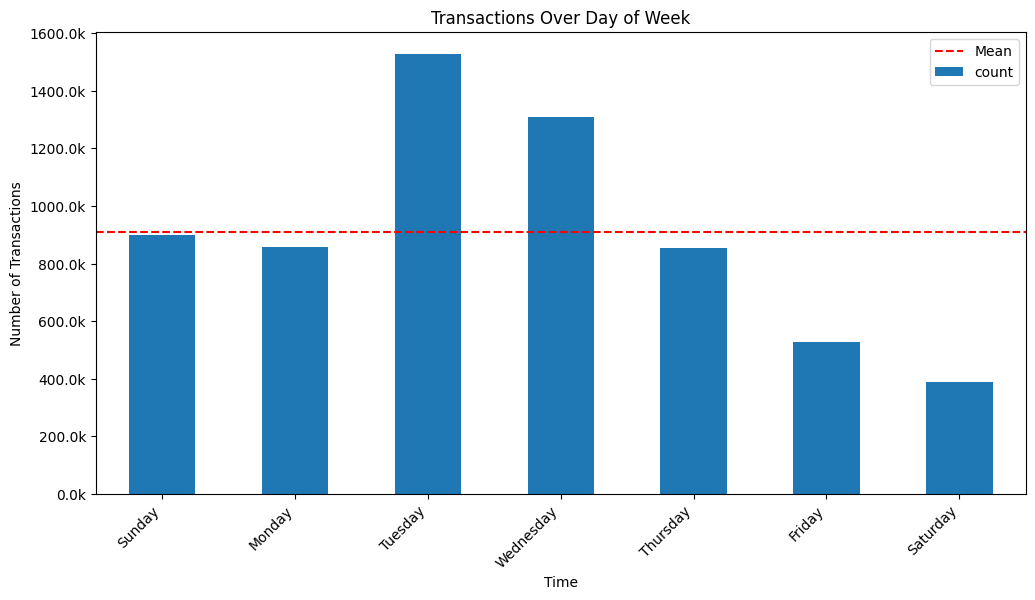

In [111]:
def y_axis_formatter(x, pos):
    return f'{x / 1000:.1f}k'
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(12, 6))
df['dayofweek'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions Over Day of Week')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.axhline(df['dayofweek'].value_counts().mean(), color='red', linestyle='--', label='Mean')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(ticks=range(7), labels=day_labels, rotation=45, ha='right')

plt.legend()
plt.show()


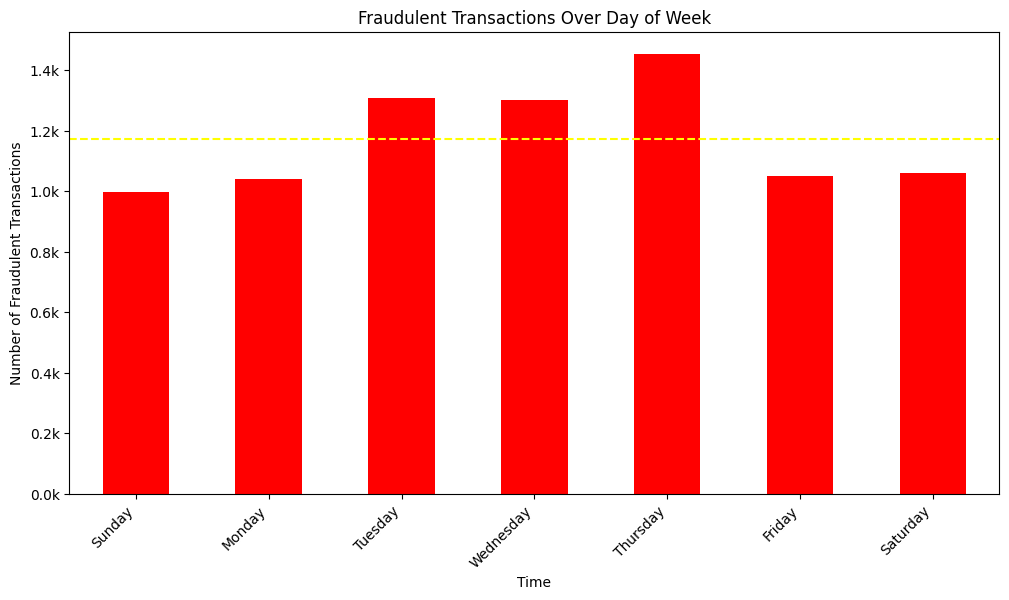

In [112]:
plt.figure(figsize=(12, 6))
df[df['is_fraud'] == 1]['dayofweek'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Fraudulent Transactions Over Day of Week')
plt.xlabel('Time')
plt.ylabel('Number of Fraudulent Transactions')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
plt.xticks(ticks=range(7), labels=day_labels, rotation=45, ha='right')
plt.axhline(df[df['is_fraud'] == 1]['dayofweek'].value_counts().mean(), color='yellow', linestyle='--', label='Mean')

we can see that fraudulent transactions are more likely to happen on Tuesday, Wendesday, and highest on Thursday.


### Transaction types

Text(0.5, 1.0, 'Transaction Types')

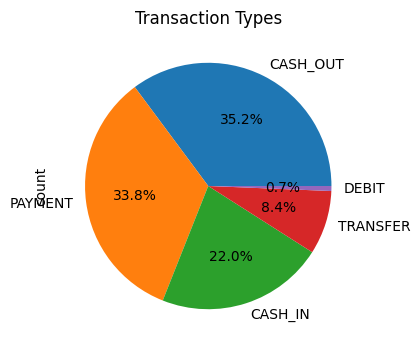

In [101]:
# pie chart of transaction type
df['transac_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
plt.title('Transaction Types')

Text(0.5, 1.0, 'Fraud Transaction Types')

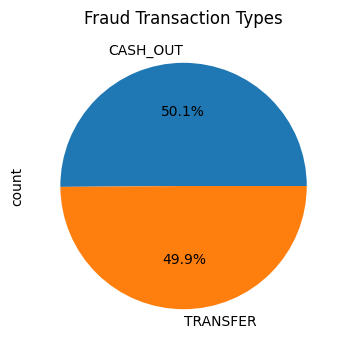

In [113]:
df[df['is_fraud']==1]['transac_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
plt.title('Fraud Transaction Types')

In [93]:
df[df['is_fraud']==1]['transac_type'].value_counts()

transac_type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

only cash_out and transfer transaction types contain fraudulent transactions.

In [105]:
df.groupby('transac_type')['is_fraud'].mean().sort_values(ascending=False)

transac_type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: is_fraud, dtype: float64

Fraudster receives money (e.g., via CASH_IN) → TRANSFER to mule account → CASH_OUT.
check this pattern

#### Cash_out transactions

In [63]:
df[(df['transac_type'] == 'CASH_OUT') & (df['is_fraud'] == 1)]['amount']/df[(df['transac_type'] == 'CASH_OUT') & (df['is_fraud'] == 1)]['src_bal']

3          1.0
252        1.0
681        1.0
724        inf
970        1.0
          ... 
6362611    1.0
6362613    1.0
6362615    1.0
6362617    1.0
6362619    1.0
Length: 4116, dtype: float64

In [66]:
# percentage that fraudulent cash_out transactions are 100% and over of the source balance
(df[(df['transac_type'] == 'CASH_OUT') & (df['is_fraud'] == 1)]['amount']/df[(df['transac_type'] == 'CASH_OUT') & (df['is_fraud'] == 1)]['src_bal'] >= 1).mean()

np.float64(0.9958697764820214)

over 99% of the fraudulent cash_out transactions are 100% and over of the source balance.


#### Transfer transactions

3. Fraud patterns specific to TRANSFER

From previous analysis on similar datasets:

Fan-in effect
Multiple different src_acc → same dst_acc in a short time window.
Balance anomalies
When src_bal < amount, yet the transfer is allowed.